## Listings
Basic Exploratory data analysis for the listings data set

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [6]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', 100)

In [7]:
# Import data to dataframe
listings = pd.read_csv('./data/listings.csv')

In [8]:
# Explore dataset size and datatypes

In [9]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,"Make your self at home in this charming one-bedroom apartment, centrally-located on the west sid...","Make your self at home in this charming one-bedroom apartment, centrally-located on the west sid...",none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/cfe47d69_original.jpg?interpolation=lanczos-none&si...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a small landscape business. My life revolves around b...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profile_pic/1318103129/original.jpg?interpolation=lanczo...,https://a0.muscache.com/ac/users/956883/profile_pic/1318103129/original.jpg?interpolation=lanczo...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air Conditioning"",Kitchen,Heating,""Family/Kid Frien...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,"Chemically sensitive? We've removed the irritants triggering allergy or asthma attacks, like car...","Beautiful, hypoallergenic apartment in an extremely safe, quiet and pedestrian-friendly section ...","Chemically sensitive? We've removed the irritants triggering allergy or asthma attacks, like car...",none,"Queen Anne is a wonderful, truly functional village. You can walk everywhere... for coffee, for...",What's up with the free pillows? Our home was renovated and restored with health & safety in mi...,"Convenient bus stops are just down the block, if you're headed downtown or further afield to exp...",https://a0.muscache.com/ac/pictures/14409893/f8e3ed8d_original.jpg?interpolation=lanczos-none&si...,https://a0.muscache.com/im/pictures/14409893/f8e3ed8d_original.jpg?aki_policy=medium,https://a0.muscache.com/ac/pictures/14409893/f8e3ed8d_original.jpg?interpolation=lanczos-none&si...,https://a0.muscache.com/ac/pictures/14409893/f8e3ed8d_original.jpg?interpolation=lanczos-none&si...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seat

In [10]:
listings.shape

(3818, 92)

In [11]:
listings.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                           object
host_location                        object
host_about                           object
host_response_time              

In [12]:
listings.isna().sum()

id                                     0
listing_url                            0
scrape_id                              0
last_scraped                           0
name                                   0
summary                              177
space                                569
description                            0
experiences_offered                    0
neighborhood_overview               1032
notes                               1606
transit                              934
thumbnail_url                        320
medium_url                           320
picture_url                            0
xl_picture_url                       320
host_id                                0
host_url                               0
host_name                              2
host_since                             2
host_location                          8
host_about                           859
host_response_time                   523
host_response_rate                   523
host_acceptance_

In [26]:
listings.nunique()

id                                  3818
listing_url                         3818
name                                3792
summary                             3478
space                               3119
description                         3742
neighborhood_overview               2506
notes                               1999
transit                             2574
thumbnail_url                       3498
medium_url                          3498
picture_url                         3818
xl_picture_url                      3498
host_id                             2751
host_url                            2751
host_name                           1466
host_since                          1380
host_location                        120
host_about                          2011
host_response_time                     4
host_response_rate                    45
host_acceptance_rate                   2
host_is_superhost                      2
host_thumbnail_url                  2743
host_picture_url

In [13]:
listings.id.nunique()

3818

## Data preparation
- Remove columns without variance (only one unique value).   
- Remove columns that will not be used in further analysis (e.g. urls, ids). Case by case explanation is provided in the comment below.   
- Replace text that can not be categorized with boolean if the text field is filled.   
- Replace dates with continuous variable (Timestamp)
- Replace t/f with True/False
- Create multiple columns from columns with lists as entries

In [35]:
# Remove columns without variance
listings = listings.loc[:, (listings != listings.iloc[0]).any()]
# Remove columns with all NAs
listings = listings.dropna(how="all", axis=1)

In [39]:
# Columns to be dropped
cols_to_drop = ["listing_url", "host_id", "host_url", "host_total_listings_count", "street", "neighbourhood",
                "neighbourhood_cleansed", "city", "latitude", "longitude", "calculated_host_listings_count"]
# Columns with text that can not easily be categorized, replace with True if text field is filled, False if empty
cols_text = ["name", "summary", "space", "description", "neighborhood_overview", "notes", "transit", "thumbnail_url",
             "medium_url", "picture_url", "xl_picture_url", "host_name", "host_about", "host_thumbnail_url",
             "host_picture_url", ]
cols_t_f = ["host_is_superhost", "host_has_profile_pic", "host_identity_verified", "is_location_exact", "instant_bookable",
           "require_guest_profile_picture"]
cols_with_list = ["host_verifications", "amenities"]
cols_dates = ["host_since", "first_review", "last_review"]
cols_remove_currency = ["price", "weekly_price", "monthly_price", "security_deposit", "cleaning_fee", "extra_people"]

In [43]:
# drop columns as specified
listings = listings.drop(columns=cols_to_drop, errors="ignore")

In [ ]:
def replace_text_with_bool(data, cols):
    """
    
    """

In [41]:
listings.shape

(3818, 70)

In [110]:
# Remove dollar symbol from price column to create numerical values
# Assumption: All values are in dollars
# NAs are kept in the dataset, as replacing them with $0 would skew the data. No price is required if the listing is not available
calendar['price'] = calendar['price'].str.replace(',', '').str.replace('$', '').astype(float)

# Replace availability values with Boolean (available t = 1, f = 0)
calendar['available'] = calendar.available.map(lambda x: True if x == 't' else False)

# Change date to type datetime to be able to group by time intervalls
calendar['date'] = pd.to_datetime(calendar['date'], infer_datetime_format=True)

## Data Understanding

In [111]:
calendar.describe()

,listing_id,price
count,1.393570e+06,934542.000000
mean,5.550111e+06,137.944859
std,2.962274e+06,105.062870
min,3.335000e+03,10.000000
25%,3.258213e+06,75.000000
50%,6.118244e+06,109.000000
75%,8.035212e+06,160.000000
max,1.034016e+07,1650.000000


In [116]:
availability_rates = calendar.groupby("listing_id")["available"].mean()

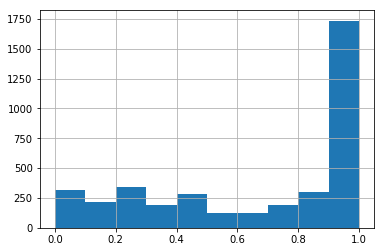

In [118]:
availability_rates.hist()

In [123]:
availability_rates.describe()

count    3818.000000
mean        0.670610
std         0.347322
min         0.000000
25%         0.339726
50%         0.843836
75%         0.986301
max         1.000000
Name: available, dtype: float64

On average, the listings are available 67% of the year. However, the availability rate of the listings is highly skewed to the right.   
The listings are available for a median of 84% of the year and a 75th-percentile of 99%

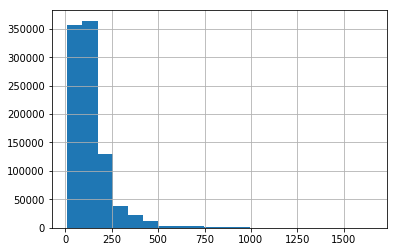

In [125]:
calendar.price.hist(bins=20)

In [126]:
calendar.price.describe()

count    934542.000000
mean        137.944859
std         105.062870
min          10.000000
25%          75.000000
50%         109.000000
75%         160.000000
max        1650.000000
Name: price, dtype: float64

The average price for a night across all listings is \\$137, with a median of \\$109 and the maximum being \\$1650

In [140]:
price_per_listing = pd.pivot_table(calendar, values="price", index="listing_id", aggfunc=["count", "mean", "std", "min", "max"])
price_per_listing["range"] =price_per_listing["max"] - price_per_listing["min"]

In [135]:
price_per_listing.describe()

,count,mean,std,min,max,range
,price,price,price,price,price,
count,3818.000000,3723.000000,3716.000000,3723.000000,3723.000000,3723.000000
mean,244.772656,135.764060,12.272805,116.947891,158.611335,41.663443
std,126.772526,97.385682,22.859473,82.803374,125.160817,80.938181
min,0.000000,20.000000,0.000000,10.000000,20.000000,0.000000
25%,124.000000,75.629042,0.000000,69.000000,80.000000,0.000000
50%,308.000000,108.416107,3.442197,97.000000,120.000000,10.000000
75%,360.000000,162.099432,13.589837,138.500000,190.000000,45.000000
max,365.000000,1301.818182,356.322687,1000.000000,1650.000000,1150.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017D09A820B8>,
      dtype=object)

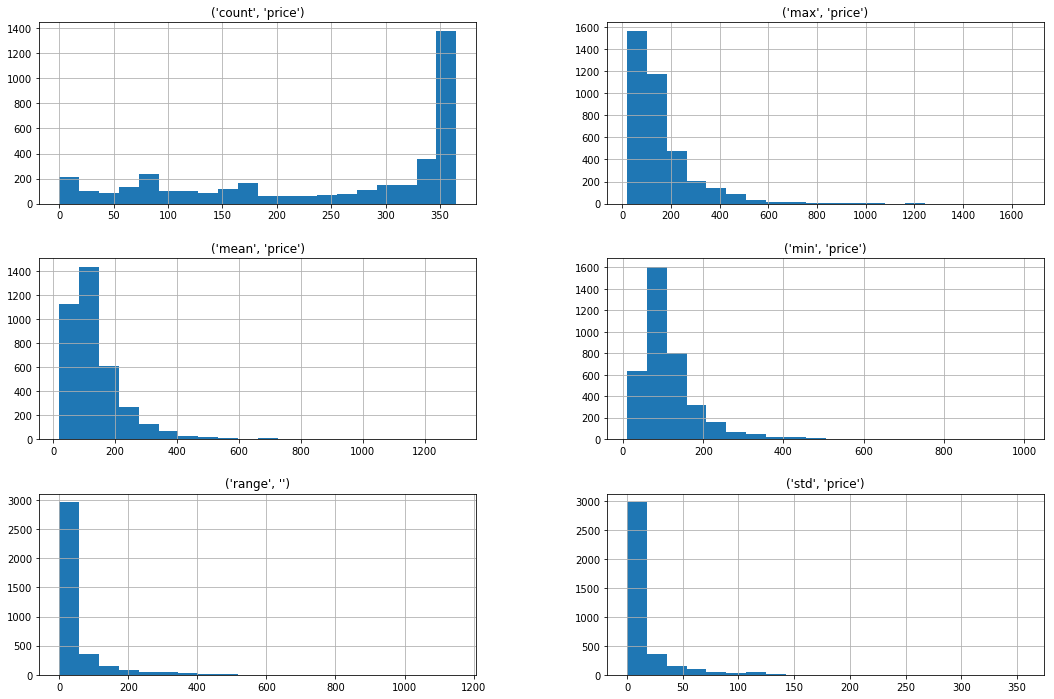

In [142]:
price_per_listing.hist(figsize=(18, 12), bins=20)

The average listing price fluctuates by \\$42 during the year with a median of \\$10 of fluctuation and a maximum of \\$1150.   
Therefore, most listings only change prices by small amounts during the year. An incraese could be waranted by high demand due to events, conventions or holiday season

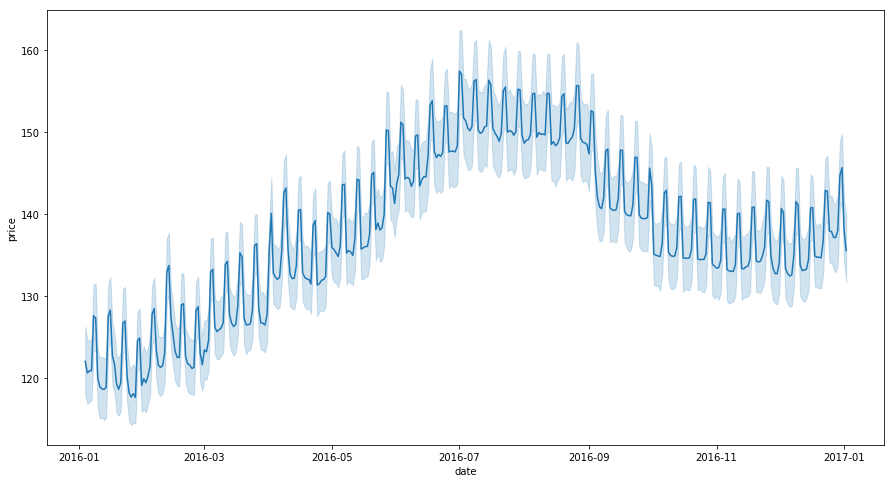

In [148]:
plt.figure(figsize=(15, 8))
sns.lineplot(x="date", y="price",
             data=calendar)

A plot of the price over the year shows that prices increase during the spring with a peak during the summer months in July and August. A drop in September marks the end of the summer holiday and travel season.